In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifadataset/submission.csv
/kaggle/input/fifadataset/FIFA_train.csv
/kaggle/input/fifadataset/FIFA_test.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = '../input/fifadataset/'
fifa_train = pd.read_csv(data_path + 'FIFA_train.csv')
fifa_test = pd.read_csv(data_path + 'FIFA_test.csv')
submission = pd.read_csv(data_path + 'submission.csv')

In [4]:
fifa_train.shape, fifa_test.shape, submission.shape   # test 데이터에는 value 칼럼이 없음

((8932, 12), (3828, 11), (3828, 2))

In [5]:
fifa_train.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [6]:
fifa_test.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


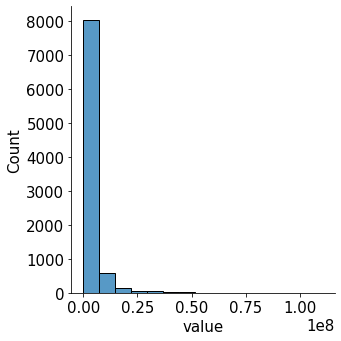

In [7]:
mpl.rc('font', size = 15) # 폰트 크기 15
sns.displot(fifa_train['value'], bins =15); # 분포가 0에 몰려있음(좋은 성능을 기대하기 어려움)

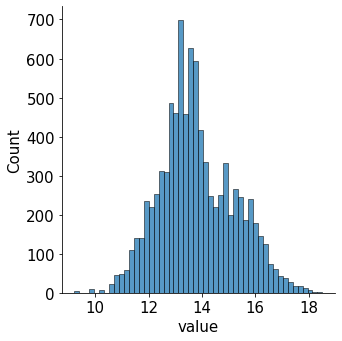

In [8]:
sns.displot(np.log(fifa_train['value'])) # 데이터 분포를 정규 분포에 가깝게 만들기 위해 로그변환을 함

### 타깃값을 value가 아닌 log(value)로 변환해 사용 // 마지막에는 지수 변환 하여 원래 value로 복원

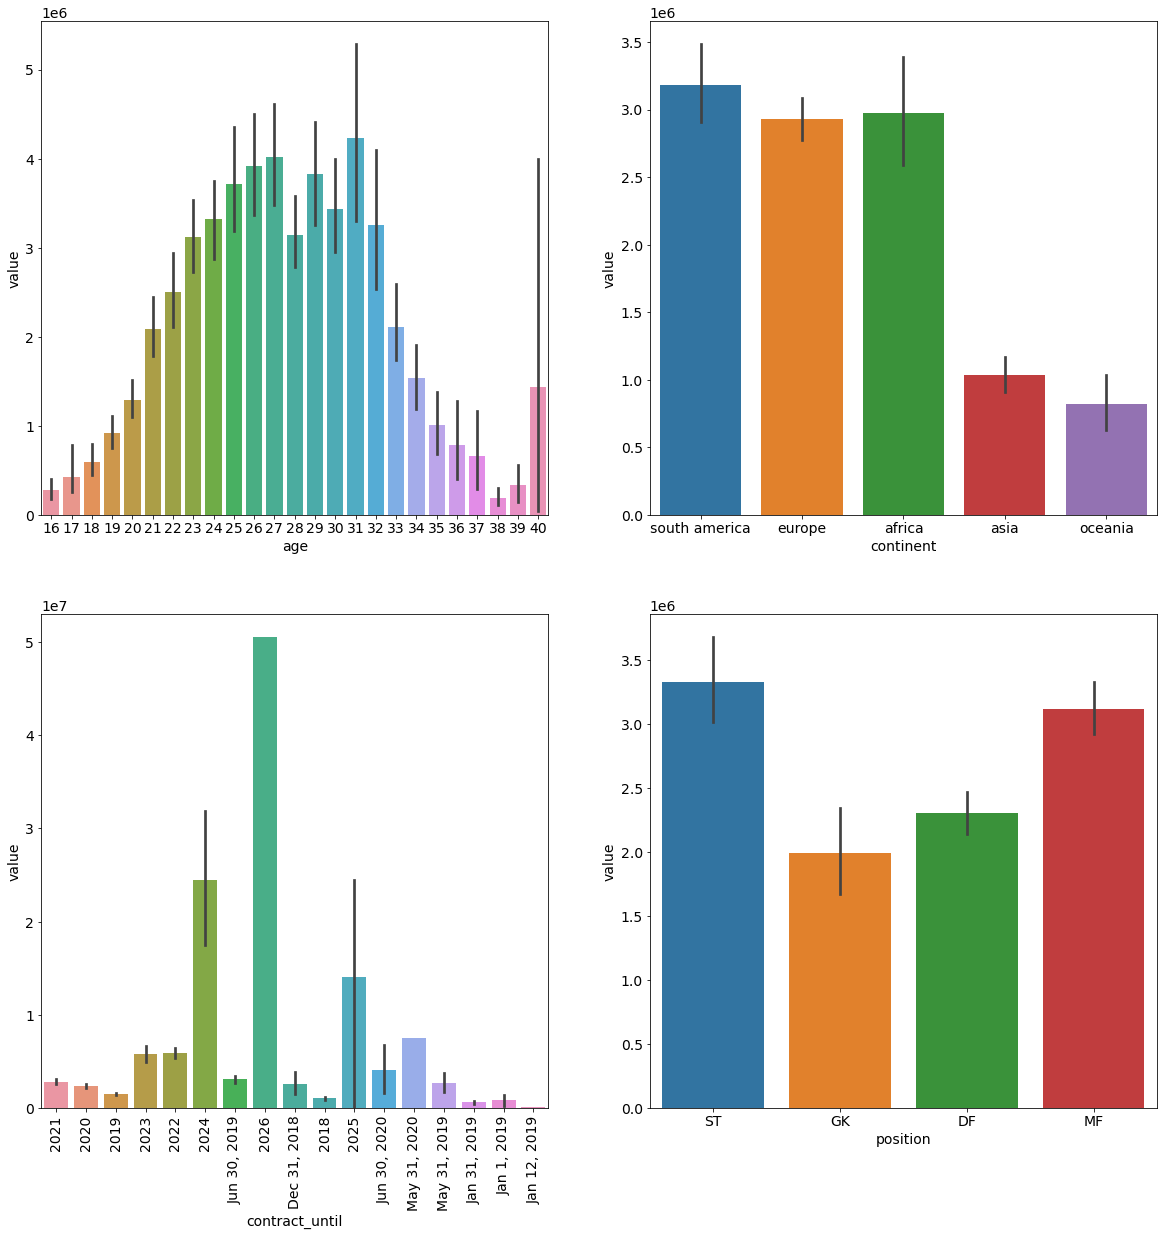

In [9]:
mpl.rc('font', size = 14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 2, ncols=2) # 2행 4열 Figure 생성
# plt.tight_layout()
figure.set_size_inches(20,20)

sns.barplot(x='age', y='value', data=fifa_train, ax = axes[0,0])
sns.barplot(x='continent', y='value', data=fifa_train, ax = axes[0,1])
sns.barplot(x='contract_until', y='value', data=fifa_train, ax = axes[1,0])
sns.barplot(x='position', y='value', data=fifa_train, ax = axes[1,1])
axes[1,0].tick_params(axis = 'x', labelrotation = 90)

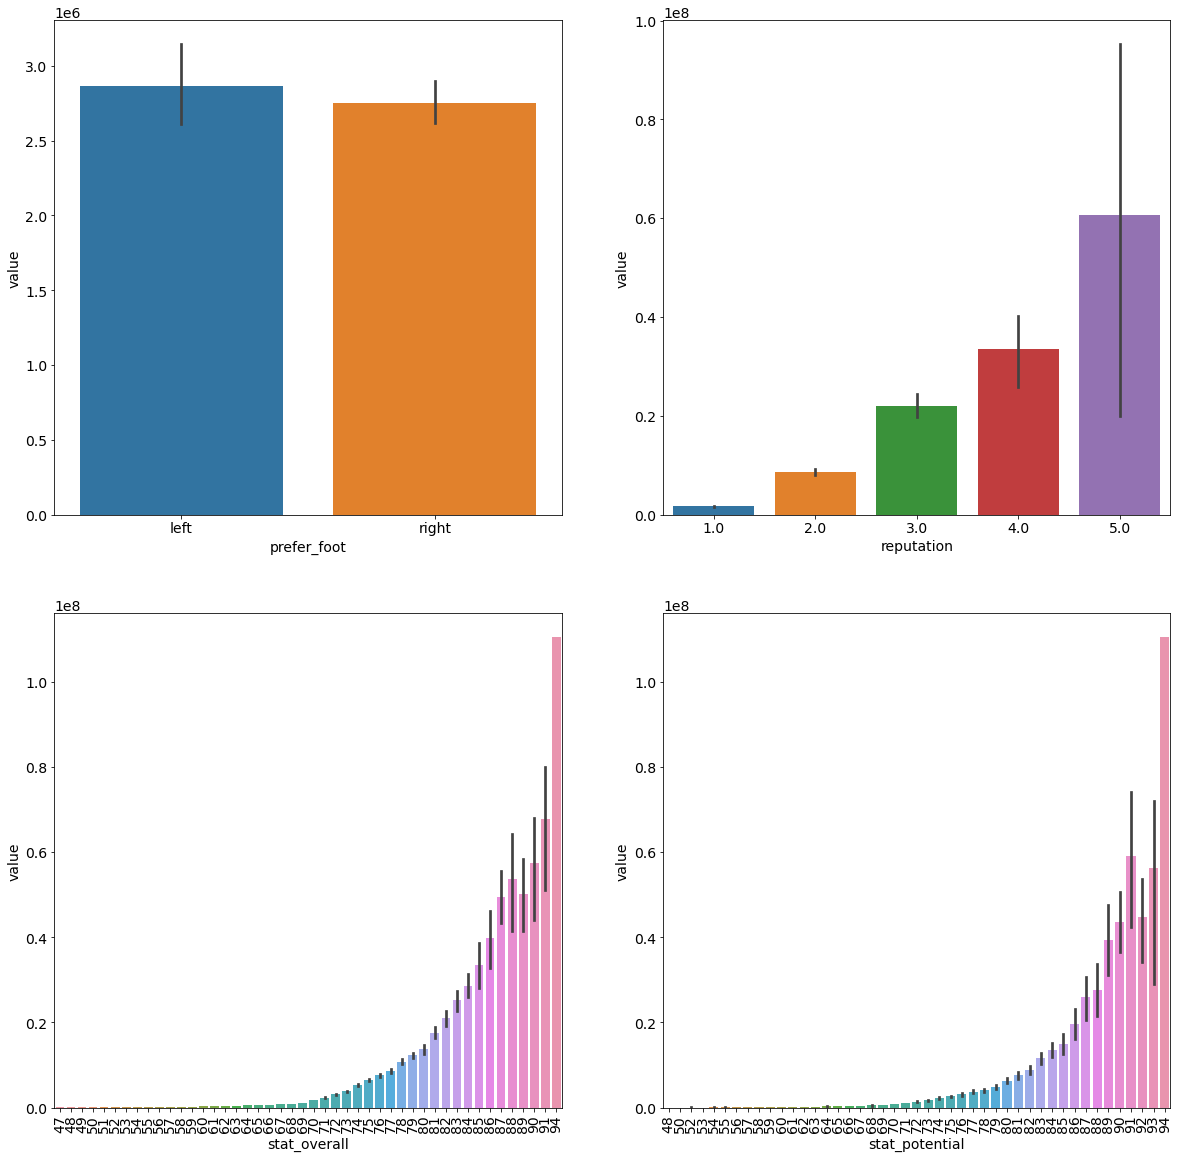

In [10]:
mpl.rc('font', size = 14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 2, ncols=2) # 2행 4열 Figure 생성
# plt.tight_layout()
figure.set_size_inches(20,20)


sns.barplot(x='prefer_foot', y='value', data=fifa_train, ax = axes[0,0])
sns.barplot(x='reputation', y='value', data=fifa_train, ax = axes[0,1])
sns.barplot(x='stat_overall', y='value', data=fifa_train, ax = axes[1,0])
sns.barplot(x='stat_potential', y='value', data=fifa_train, ax = axes[1,1])
axes[1,0].tick_params(axis = 'x', labelrotation=90) # x축의 라벨을 90도 회전
axes[1,1].tick_params(axis = 'x', labelrotation=90)

<AxesSubplot:xlabel='stat_skill_moves', ylabel='value'>

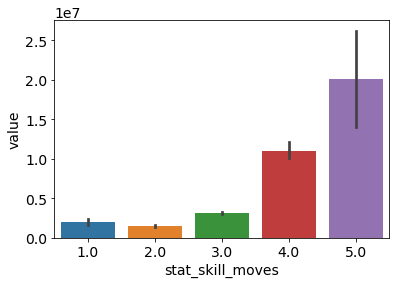

In [11]:
sns.barplot(x='stat_skill_moves', y='value', data=fifa_train)

In [12]:
fifa_train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [13]:
fifa_train[['age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value']].corr()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


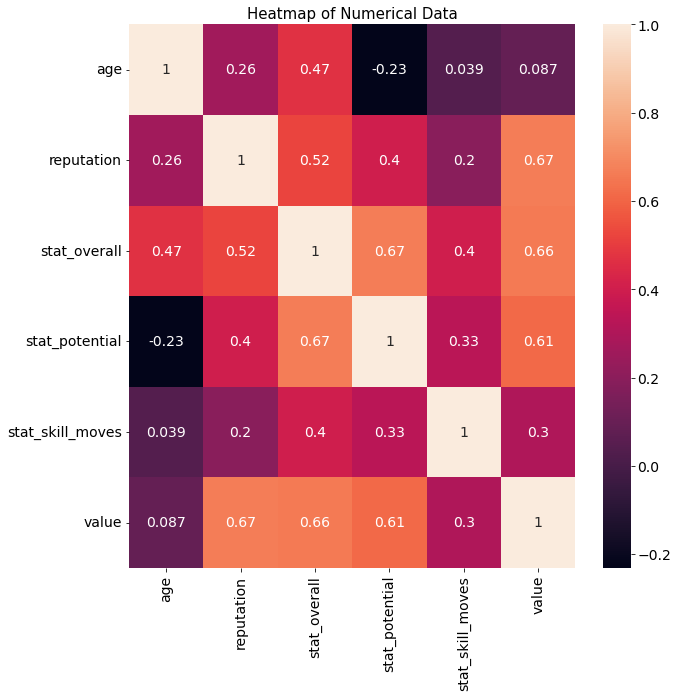

In [14]:
corrMat = fifa_train[['age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

#### age, prefer_foot, contract_until 피처 제거 contract_until은 모델 훈련 후 성능이 낮으면 사용

## 나중에 다시 사용

#### fifa_train['contract_until'].apply(lambda x: x[-4:]).value_counts()
#### fifa_train['new_contract_until'] = fifa_train['contract_until'].apply(lambda x: x[-4:]).apply(lambda x: int(x))
#### fifa_train['new_contract_until'].apply(lambda x: int(x))
#### new_fifa_train = fifa_train.loc[fifa_train['new_contract_until'] < 2024]
#### new_fifa_train.head()
#### new_fifa_train['new_contract_until']
#### sns.barplot(x='new_contract_until', y = 'value', data = new_fifa_train)
#### fifa_train.head(10)
#### new_fifa_train.corr()

In [15]:
fifa_train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [16]:
fifa_test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [17]:
all_data = pd.concat([fifa_train, fifa_test], ignore_index=True)
all_data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12755,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0,NaN
12756,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0,NaN
12757,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0,NaN
12758,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0,NaN


In [18]:
all_data.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

### 제거 특성
1. id
2. name
3. age
4. contract_until (훈련 후 성능이 낮을 시 추가)
5. prefer_foot

### 중요 특성
1. continent (학습 후 성능이 낮을 시 제거) 
2. position
3. reputation
4. stat_overall
5. stat_potential
6. stat_skill_moves(학습 후 성능이 낮을 시 제거)

In [19]:
drop_feature = ['id', 'name', 'age', 'contract_until','prefer_foot'] # 피처 제거

all_data = all_data.drop(drop_feature, axis=1)

In [20]:
all_data.head()

,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,south america,ST,5.0,94,94,4.0,110500000.0
1,europe,GK,4.0,91,93,1.0,72000000.0
2,south america,ST,5.0,91,91,3.0,80000000.0
3,europe,DF,4.0,91,91,3.0,51000000.0
4,europe,GK,3.0,90,93,1.0,68000000.0


In [21]:
print(all_data['continent'].unique()) #  continent 고유값 확인
print(all_data['position'].unique()) # position 고유값 확인

['south america' 'europe' 'africa' 'asia' 'oceania']
['ST' 'GK' 'DF' 'MF']


#### 글자로 되어있는 범주형 데이터 숫자로 수정

In [22]:
all_data['continent'] = all_data['continent'].map({'south america' : 0, 'europe' : 1, 'africa' : 2, 'asia' : 3, 'oceania' : 4})

In [23]:
all_data['position'] = all_data['position'].map({'ST':0, 'GK':1, 'DF':2, 'MF':3})

In [24]:
all_data

,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,0,5.0,94,94,4.0,110500000.0
1,1,1,4.0,91,93,1.0,72000000.0
2,0,0,5.0,91,91,3.0,80000000.0
3,1,2,4.0,91,91,3.0,51000000.0
4,1,1,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...
12755,3,3,1.0,48,63,2.0,NaN
12756,1,1,1.0,48,65,1.0,NaN
12757,0,3,1.0,48,65,2.0,NaN
12758,1,0,1.0,47,61,2.0,NaN


In [25]:
X_train = all_data[~pd.isnull(all_data['value'])] # 타겟이 존재하는 데이터는 훈련 데이터
X_test = all_data[pd.isnull(all_data['value'])] # 타겟이 없는 데이터는 테스트 데이터

In [26]:
X_train = X_train.drop(['value'], axis = 1) # 타겟값 제거
X_test = X_test.drop(['value'], axis = 1) # 타겟값 제거

In [27]:
y = fifa_train['value']

In [28]:
X_train.head()

,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,0,0,5.0,94,94,4.0
1,1,1,4.0,91,93,1.0
2,0,0,5.0,91,91,3.0
3,1,2,4.0,91,91,3.0
4,1,1,3.0,90,93,1.0


## 평가지표 계산 함수 작성(RMSLE)
#### 타깃값을 로그변환 했을 때 정규분포가 되기 때문에 로그를 사용하는 RMSLE 사용

In [29]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그 변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1)) 
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 모델 훈련

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [31]:
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [32]:
rfr = RandomForestRegressor()

rf_params = {'random_state': [42], 'n_estimators':[100,120,140,160,180,200,220,240,260,280,300]} # 그리드 서치 수행
gridsearch_rfr_model = GridSearchCV(estimator=rfr,               # 랜덤 포레스트 모델
                                   param_grid=rf_params,         # 값 목록
                                   scoring=rmsle_scorer,         # 평가지표
                                   cv=5)                         # 교차 검증 분할 수

# 그리드서치 수행
log_y = np.log(y)
gridsearch_rfr_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :',gridsearch_rfr_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 280, 'random_state': 42}


## 모델 성능 검증

In [33]:
# 예측
preds = gridsearch_rfr_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 :{rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 :0.2174


## 데이터 분포도 비교

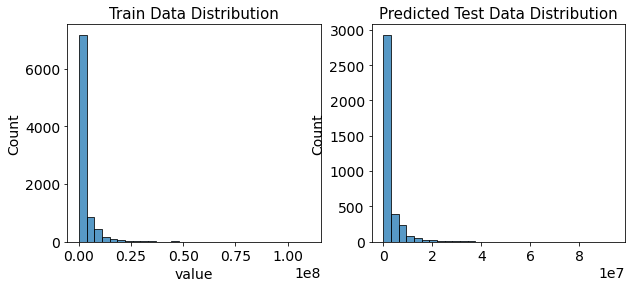

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

rf_preds = gridsearch_rfr_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)

sns.histplot(y, bins = 30, ax=axes[0])
axes[0].set_title('Train Data Distribution') # 원래 분포도
sns.histplot(np.exp(rf_preds), bins = 30, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution'); # 예측한 값의 분포도